# Deploying the CNN

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import nibabel as nib
import os
import glob
import sys
import time
import siamxt

MY_UTILS_PATH = "../Modules/"
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import ipt_utils
import cnn_utils
import metrics_utils

Using TensorFlow backend.


In [2]:
orig_path = "/media/roberto/DATA/GDrive/MR-Data/CC-359/STAPLE_gray"

imgs_list = cc12_list =np.genfromtxt("../Data/cc12_orig.txt", dtype ="string")

imgs_list = [os.path.join(orig_path,f.split(".")[0]+"_staple.nii.gz") for f in imgs_list]
print imgs_list[0]

stats = np.load("../Data/wm_unet_cc347.npy")
mean = stats[0]
std = stats[1]

model_path = "../Data/wm_unet_cc_347_best.hdf5"

/media/roberto/DATA/GDrive/MR-Data/CC-359/STAPLE_gray/CC0003_philips_15_63_F_staple.nii.gz


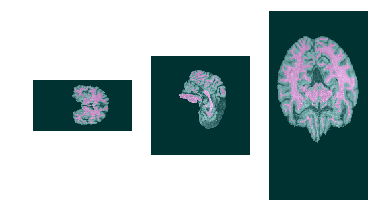

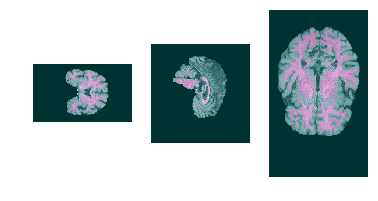

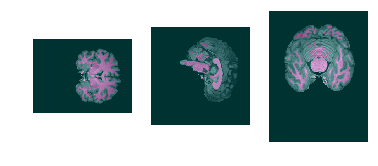

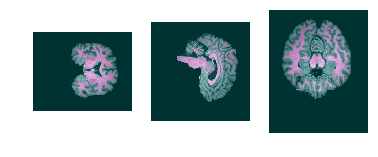

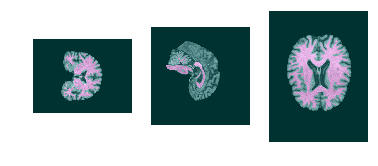

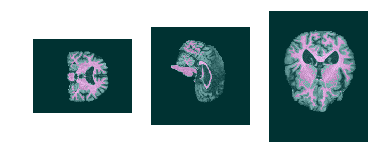

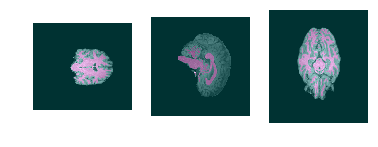

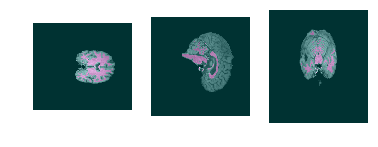

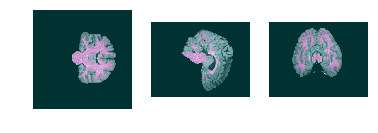

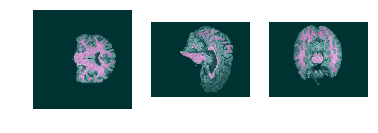

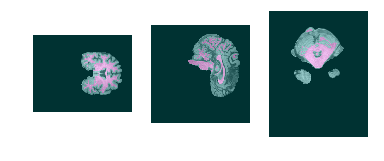

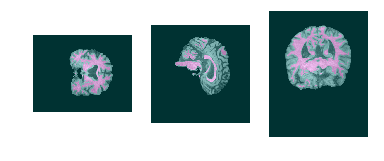

In [3]:
model = cnn_utils.get_unet_mod()
model.load_weights(model_path)
for ii in xrange(len(imgs_list)):
    img = nib.load(imgs_list[ii])
    affine = img.affine
    img = img.get_data()
    img = img.transpose(1,0,2)
    img_min = img.min()
    img_max = img.max()
    img_norm = 1.0*(img - img_min)/(img_max-img_min)
    img_norm -= mean
    img_norm /= std
    x,y,z = img_norm.shape
    img_rgb = np.zeros((x-2,y,z,3))
    img_rgb[:,:,:,0] = img_norm[0:-2,:,:]
    img_rgb[:,:,:,1] = img_norm[1:-1,:,:]
    img_rgb[:,:,:,2] = img_norm[2:,:,:]
    img_rgb,nw,nz  = cnn_utils.pad_images(img_rgb)
    predict = model.predict(img_rgb)
    predict = predict[:,:-nw,:-nz,0]
    predict2 = np.zeros((x,y,z))
    predict2[1:-1,:,:] = predict
    predict2 = (predict2 >0.5).astype(np.uint8)
    H,W,Z = img_norm.shape
    plt.figure()
    plt.subplot(131)
    plt.imshow(img_norm[H/2,:,:], cmap = 'gray')
    plt.imshow(predict2[H/2,:,:], cmap = 'cool',alpha = 0.2)
    plt.axis("off")
    plt.subplot(132)
    plt.imshow(img_norm[:,W/2,:], cmap = 'gray')
    plt.imshow(predict2[:,W/2,:], cmap = 'cool',alpha = 0.2)
    plt.axis("off")
    plt.subplot(133)
    plt.imshow(img_norm[:,:,Z/2], cmap = 'gray')
    plt.imshow(predict2[:,:,Z/2], cmap = 'cool',alpha = 0.2)
    plt.axis("off")
    plt.show()